In [136]:
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [137]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Step1. Inspect Data

In [138]:
data = pd.read_csv("C:/Users/ryoch/DataSets/Churn_Modelling.csv")
data.shape

(10000, 14)

In [139]:
# Check if there is null in the data
data.apply(lambda x: sum(x.isnull()))

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [141]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [142]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Step2. Feature Engineering

In [143]:
# Encode text features
le = LabelEncoder()
var_mod = ['Geography', 'Gender', 'Age']
for i in var_mod:
    data[i] = le.fit_transform(data[i])
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,24,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,23,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,24,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,21,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,25,2,125510.82,1,1,1,79084.10,0


In [144]:
# Drop columns which might not help the analysis
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,24,2,0.00,1,1,1,101348.88,1
1,608,2,0,23,1,83807.86,1,0,1,112542.58,0
2,502,0,0,24,8,159660.80,3,1,0,113931.57,1
3,699,0,0,21,1,0.00,2,0,0,93826.63,0
4,850,2,0,25,2,125510.82,1,1,1,79084.10,0


In [145]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [146]:
features = data[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
label = data['Exited']

### Step3. Split to train/test dataset

In [147]:
x_train, x_test, y_train, y_test = train_test_split(features, label,test_size=0.3,random_state=109)

### Step4. Apply to classifier algorithms

#### Naive Bayes

In [148]:
nv = GaussianNB()
nv.fit(x_train, y_train)
predicted = nv.predict(x_test)
score = "{0:.2%}".format(metrics.accuracy_score(y_test, predicted))
print("Naive Bayes Accuracy Score:",score)

Naive Bayes Accuracy Score: 78.53%


#### Decision Tree

In [149]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)
predicted = dt.predict(x_test)
score = "{0:.2%}".format(metrics.accuracy_score(y_test, predicted))
print("Decision Tree Accuracy Score:",score)

Decision Tree Accuracy Score: 79.50%


#### Random Forest

Random Forest Accuracy Score: 86.33%


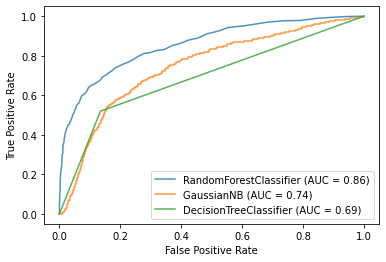

In [150]:
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, max_features='auto', random_state=42)
rf.fit(x_train, y_train)
predicted = rf.predict(x_test)
score = "{0:.2%}".format(metrics.accuracy_score(y_test, predicted))
print("Random Forest Accuracy Score:",score)

ax = plt.gca()
rfc_disp = metrics.plot_roc_curve(rf, x_test, y_test, ax=ax, alpha=0.8)
nvc_disp = metrics.plot_roc_curve(nv, x_test, y_test, ax=ax, alpha=0.8)
dtc_disp = metrics.plot_roc_curve(dt, x_test, y_test, ax=ax, alpha=0.8)